# Predicting Walmart Store Sales

In [94]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [95]:
data_raw = pd.read_csv(r'C:\Users\felix\OneDrive\Dokumente\Python Projects\Walmart Sales Forecast\walmart_cleaned.csv')
data_raw = data_raw.drop('Unnamed: 0', axis=1)
data_raw.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [96]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   IsHoliday     421570 non-null  int64  
 3   Dept          421570 non-null  float64
 4   Weekly_Sales  421570 non-null  float64
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  int64  
 15  Size          421570 non-null  int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 51.5+ MB


# Data Exploration

In [97]:
data_raw.groupby('Store')['Store'].count()

Store
1     10244
2     10238
3      9036
4     10272
5      8999
6     10211
7      9762
8      9895
9      8867
10    10315
11    10062
12     9705
13    10474
14    10040
15     9901
16     9443
17     9864
18     9859
19    10148
20    10214
21     9582
22     9688
23    10050
24    10228
25     9804
26     9854
27    10225
28    10113
29     9455
30     7156
31    10142
32    10202
33     6487
34    10224
35     9528
36     6222
37     7206
38     7362
39     9878
40    10017
41    10088
42     6953
43     6751
44     7169
45     9637
Name: Store, dtype: int64

This shows that not every store has equal amount of observations. The number of observations is relatively balanced for each store and therefore does not present an issue for future model training and subsequent model performance.

In [98]:
data_raw.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


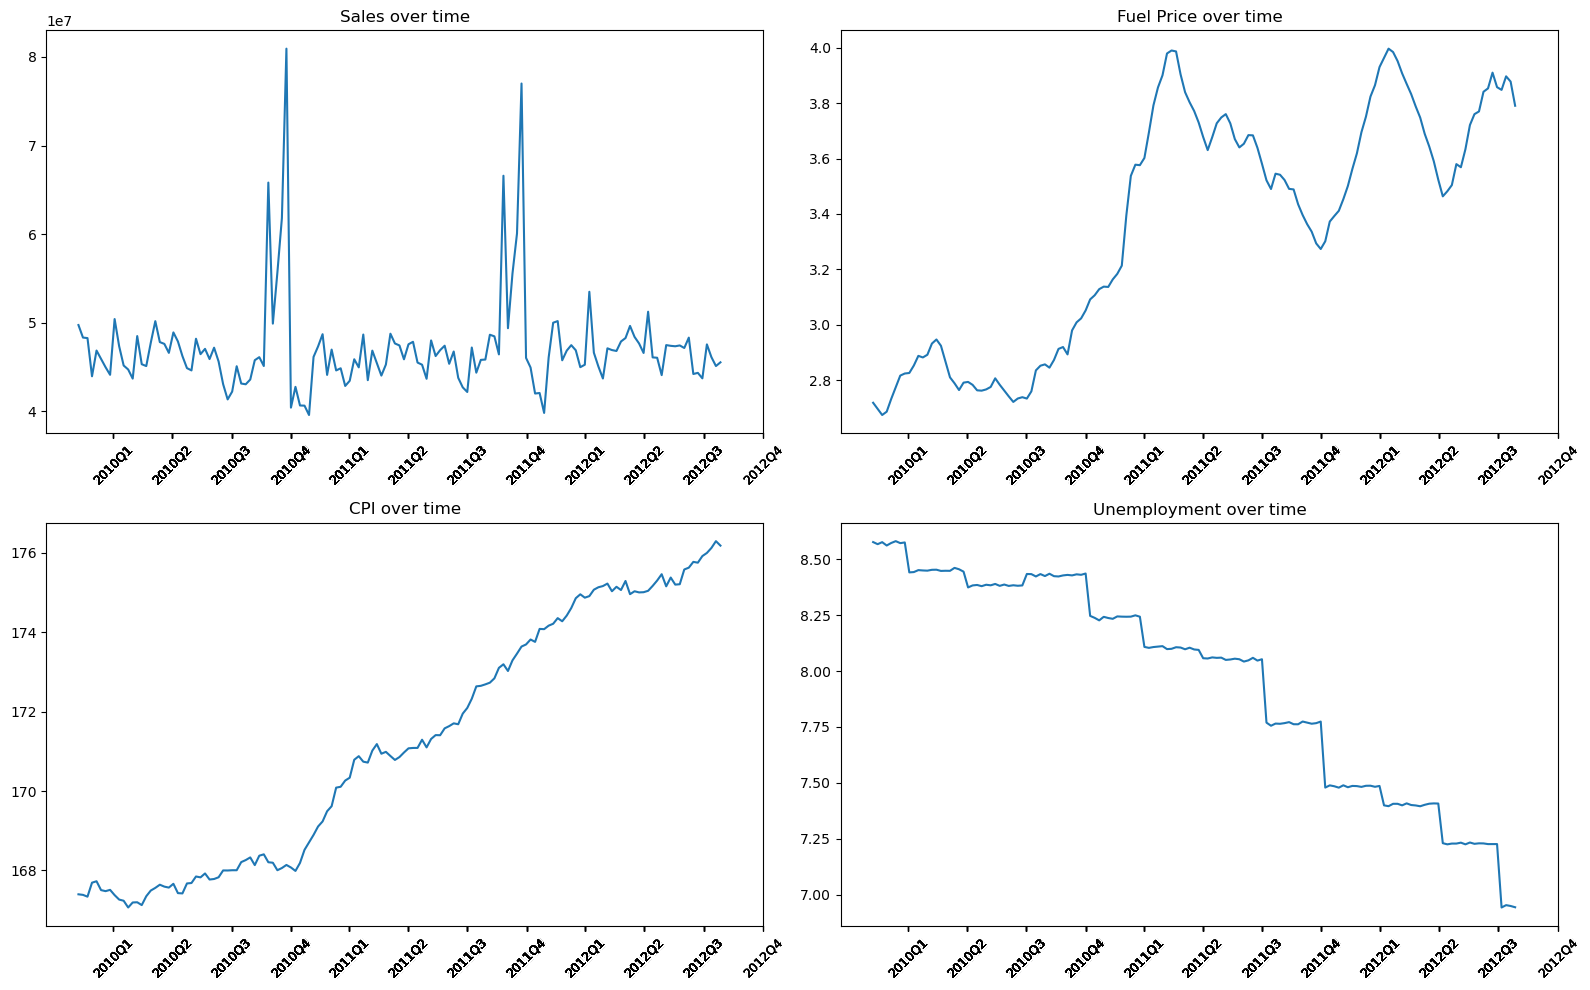

In [99]:
data_raw['Date'] = pd.to_datetime(data_raw['Date']) 

figure, axis = plt.subplots(2, 2, figsize=(16, 10)) 
sales = data_raw.groupby('Date')['Weekly_Sales'].sum()
fuel_price = data_raw.groupby('Date')['Fuel_Price'].mean()
cpi = data_raw.groupby('Date')['CPI'].mean()
unemployment = data_raw.groupby('Date')['Unemployment'].mean()
time = data_raw['Date'].unique()

quarters = pd.PeriodIndex(time, freq='Q')

axis[0, 0].plot(time, sales)
axis[0, 0].set_title("Sales over time")
axis[0, 0].set_xticks(quarters)
axis[0, 0].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[0, 1].plot(time, fuel_price)
axis[0, 1].set_title("Fuel Price over time")
axis[0, 1].set_xticks(quarters)
axis[0, 1].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[1, 0].plot(time, cpi)
axis[1, 0].set_title("CPI over time")
axis[1, 0].set_xticks(quarters)
axis[1, 0].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[1, 1].plot(time, unemployment)
axis[1, 1].set_title("Unemployment over time")
axis[1, 1].set_xticks(quarters)
axis[1, 1].set_xticklabels(quarters, rotation=45, fontsize = 9)

plt.tight_layout()
plt.show()


https://www.geeksforgeeks.org/how-to-prepare-data-before-deploying-a-machine-learning-model/?ref=ml_lbp

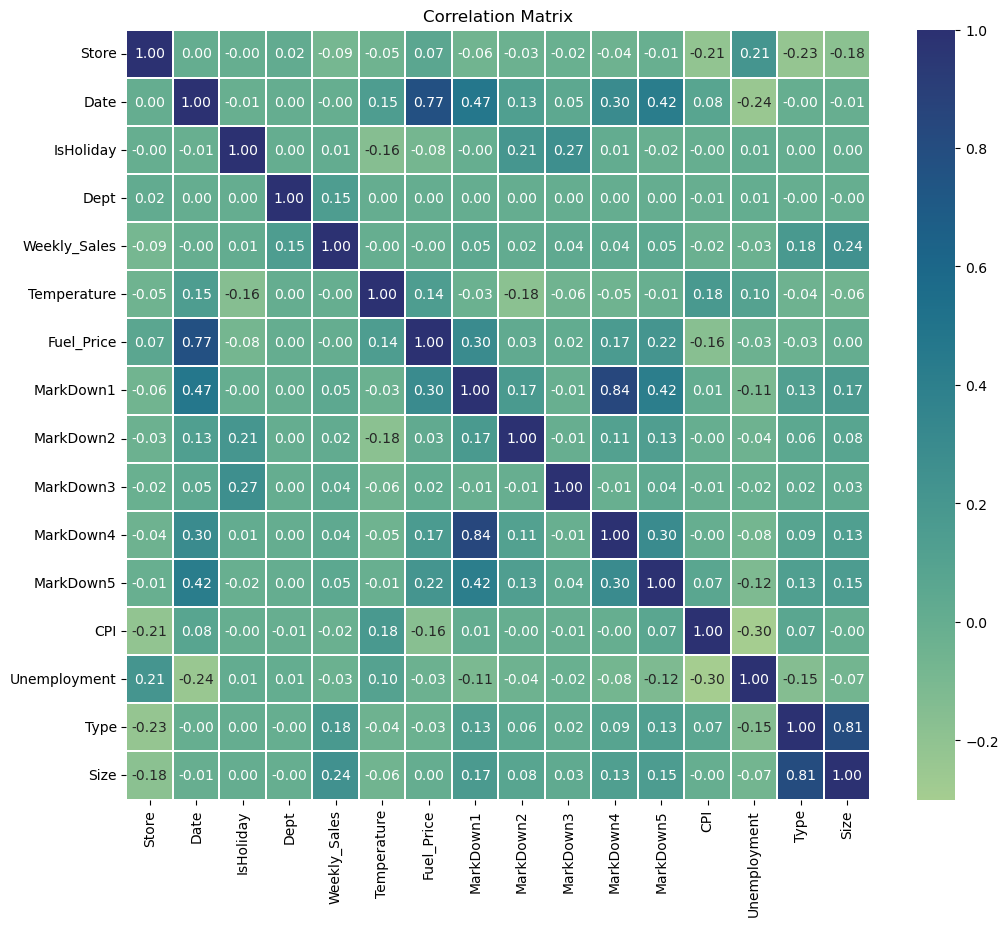

In [100]:
# Correlation plot 

corr_matrix = data_raw.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="crest",  fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

### For simplicity reasons, the target variable (weekly sales) will be predicted aggregated over the different stores.

### Split the data

In [101]:
sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [102]:
fuel_price

Date
2010-02-05    2.717869
2010-02-12    2.696102
2010-02-19    2.673666
2010-02-26    2.685642
2010-03-05    2.731816
                ...   
2012-09-28    3.858245
2012-10-05    3.848435
2012-10-12    3.897425
2012-10-19    3.878413
2012-10-26    3.791086
Name: Fuel_Price, Length: 143, dtype: float64

In [103]:
cpi

Date
2010-02-05    167.398405
2010-02-12    167.384138
2010-02-19    167.338966
2010-02-26    167.691019
2010-03-05    167.727351
                 ...    
2012-09-28    175.919639
2012-10-05    175.998254
2012-10-12    176.123786
2012-10-19    176.295499
2012-10-26    176.182886
Name: CPI, Length: 143, dtype: float64

In [104]:
unemployment

Date
2010-02-05    8.576731
2010-02-12    8.567309
2010-02-19    8.576351
2010-02-26    8.561375
2010-03-05    8.572689
                ...   
2012-09-28    7.225855
2012-10-05    6.942141
2012-10-12    6.952682
2012-10-19    6.948928
2012-10-26    6.943212
Name: Unemployment, Length: 143, dtype: float64

In [105]:
# choose 80% of the data for training and 20% for testing

train_dates = sales.index[:int(0.8*(len(sales)))]
test_dates = sales.index[int(0.8*(len(sales))):]
                        

train_sales = sales[:int(0.8*(len(sales)))]
test_sales = sales[int(0.8*(len(sales))):]

train_fuel_price = fuel_price[:int(0.8*(len(fuel_price)))]
test_fuel_price = fuel_price[int(0.8*(len(fuel_price))):]

train_cpi = cpi[:int(0.8*(len(cpi)))]
test_cpi = cpi[int(0.8*(len(cpi))):]

train_unemployment = unemployment[:int(0.8*(len(unemployment)))]
test_unemployment = unemployment[int(0.8*(len(unemployment))):]
                                 

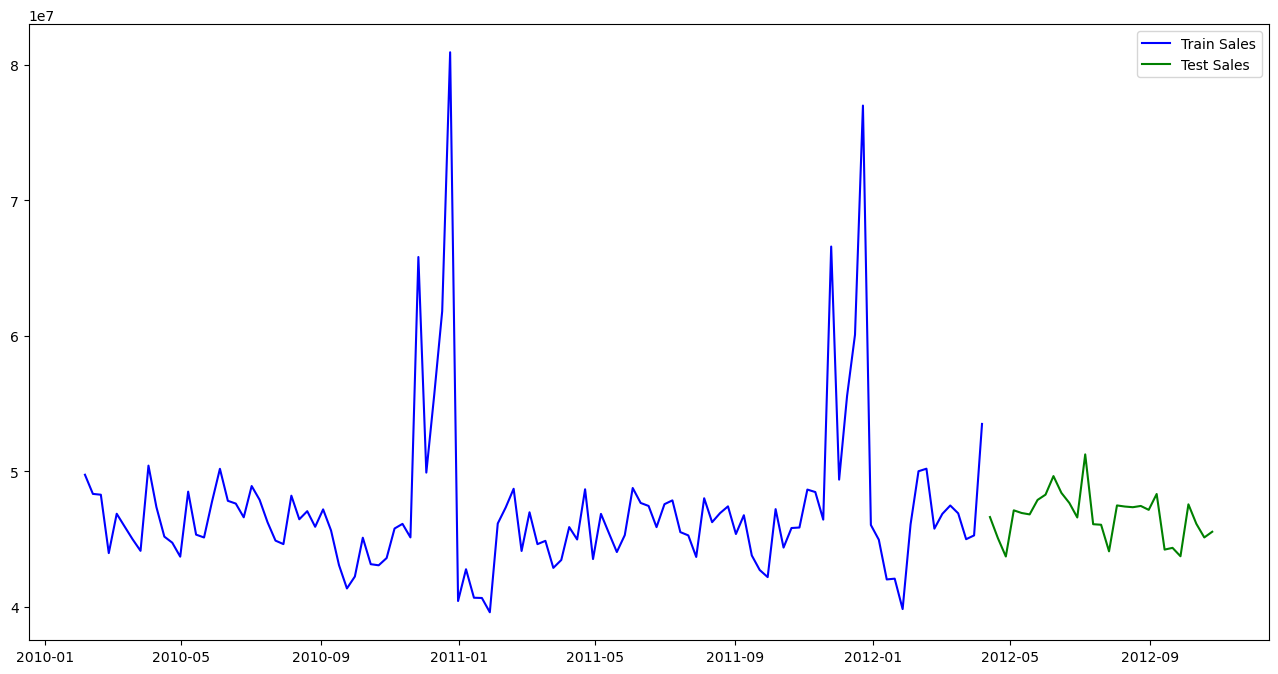

In [106]:
# visualize the sales data in different colors

plt.figure(figsize=(16, 8))
plt.plot(train_sales, label='Train Sales', color='blue')
plt.plot(test_sales, label='Test Sales', color='green')
plt.legend()
plt.show()


### Perform ``Linear Regression``, ``Holt Winter's Exponential Smoothing`` & ``(S)ARIMA(X)`` to Predict Sales


### 1. Linear Regression

In [107]:
train_dates

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09', '2012-03-16', '2012-03-23',
               '2012-03-30', '2012-04-06'],
              dtype='datetime64[ns]', name='Date', length=114, freq=None)

In [108]:
len(test_dates)

29

In [109]:
# make dates ordinal for the model

# train_dates = train_dates.map(dt.datetime.toordinal)
# test_dates = test_dates.map(dt.datetime.toordinal)

In [110]:
# import packages for linear regression with statsmodels

import statsmodels.api as sm

In [111]:
# define the independent variables

X = np.column_stack((train_cpi, train_fuel_price, train_unemployment))
X = sm.add_constant(X)

# define the dependent variable

y = train_sales

# fit the model

model = sm.OLS(y, X)
results = model.fit()

# print the summary of the model

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.229
Date:                Thu, 16 Jan 2025   Prob (F-statistic):             0.0253
Time:                        10:52:03   Log-Likelihood:                -1936.3
No. Observations:                 114   AIC:                             3881.
Df Residuals:                     110   BIC:                             3892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.66e+08   2.58e+08     -2.581      0.0

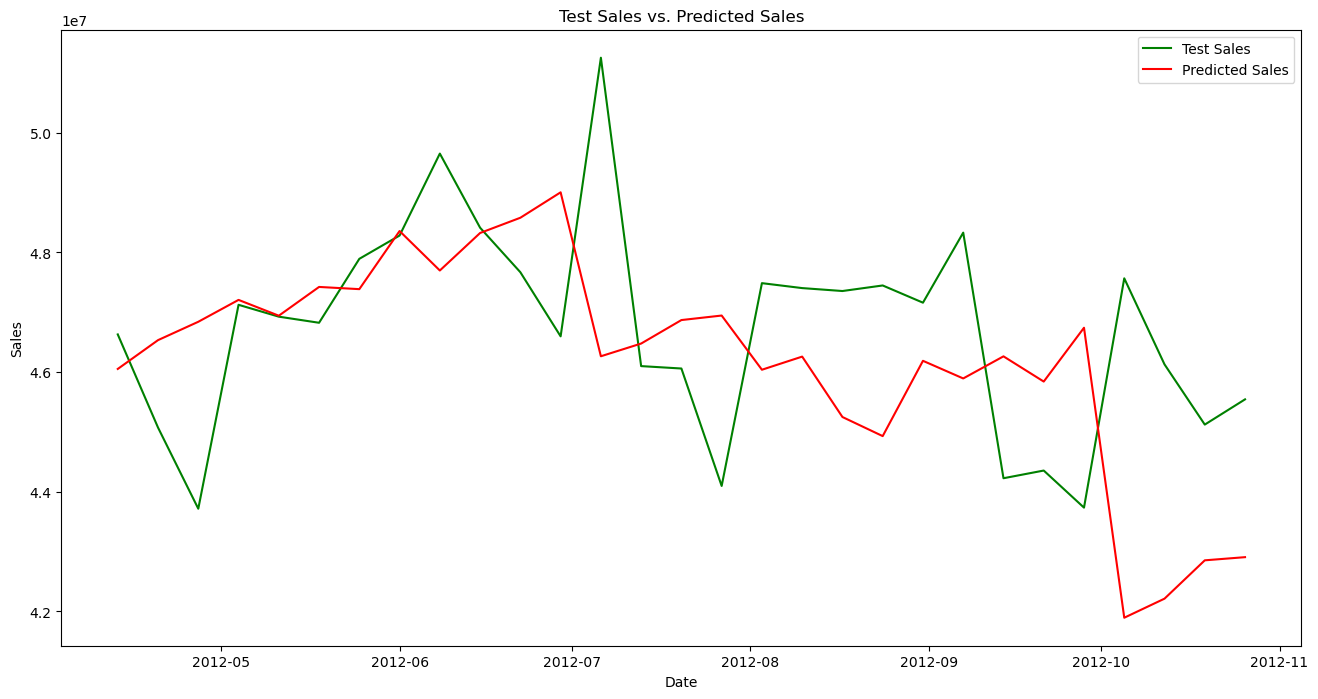

In [112]:
# predict 

X_test = np.column_stack((test_cpi, test_fuel_price, test_unemployment))
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

# visualize the prediction
plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

In [113]:
# calculate the mean squared error, rmse, mape

from sklearn.metrics import mean_squared_error
from math import sqrt


mse_lm = mean_squared_error(test_sales, y_pred)
rmse_lm = sqrt(mse_lm)
mape_lm = np.mean(np.abs((test_sales - y_pred) / test_sales)) * 100

In [114]:
mape_lm

3.8847086034875957

As can be seen from the comparison above, a simple linear regression to predict sales, using the independent variables CPI (mean), unemployement rate (mean) and fuel price (mean) yield rather poor prediction outcomes, with an R squared of 0.081 on the 80/20 train/test split. This further suggests that this model is unable to capture the complexity in the underlying time series data.

Therefore, it might be useful to explore other, more elaborate statistical models.

## Holt Winters Exponential Smoothing

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

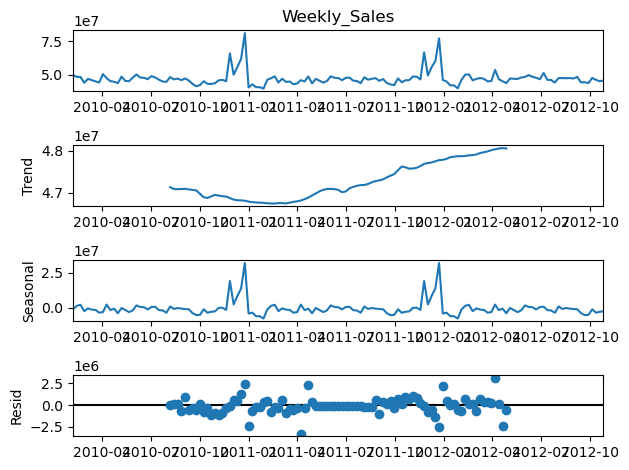

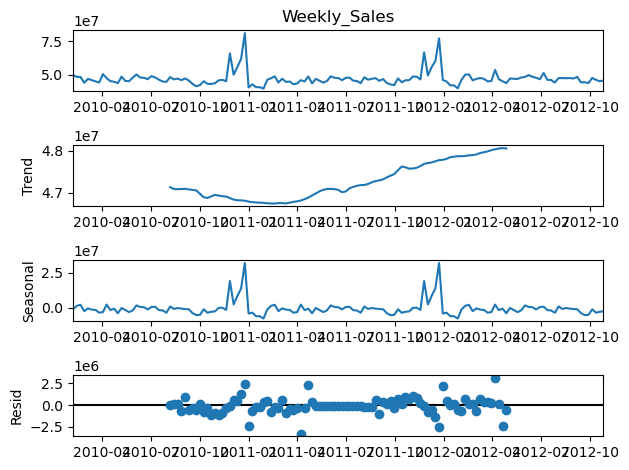

In [116]:
seasonal_decompose(sales, period=52).plot()

The decomposition above shows the different categories of decomposition on the underlying sales data. It shows a rather close and evenly distributed residuals around the mean. Moreover, it suggests seasonality and an upwards trend in sales over time.

a) Additive Model

In [117]:
# Holt-Winters Exponential Smoothing

HW_add = ExponentialSmoothing(train_sales, seasonal='add', seasonal_periods=52)
HW_add_model = HW_add.fit()
HW_add_pred = HW_add_model.forecast(len(test_sales))


c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


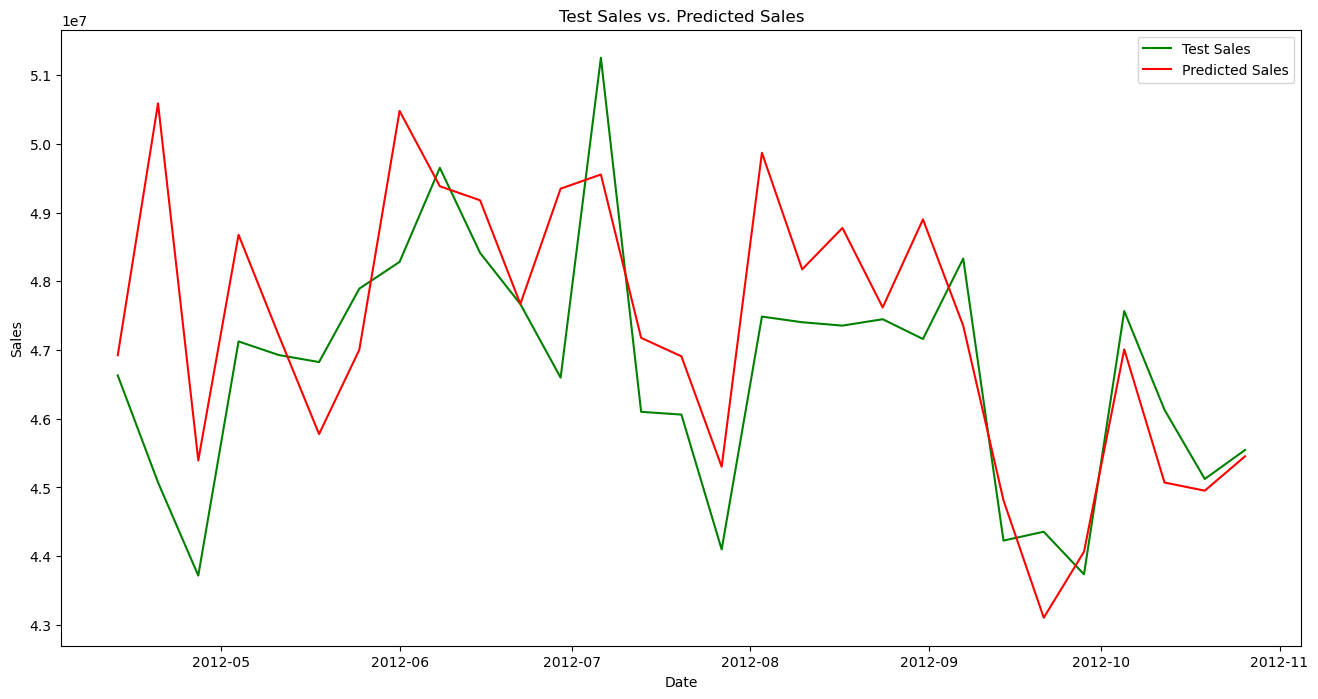

In [118]:
# visualize the prediction
plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, HW_add_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

In [119]:
# calculate the mean squared error, rmse, mean absolute percentage error

mse_hw = mean_squared_error(test_sales, HW_add_pred)
rmse_hw = sqrt(mse_hw)
mape_hw = mean_absolute_percentage_error(test_sales, HW_add_pred)*100

In [120]:
mape_hw

2.4886317003773626

## (S)ARIMA(X) models

In [121]:
# Perform ARIMA model 

from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs, nsdiffs
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [122]:
# explore stationarity of the data with ndiffs and nsdiffs to determine the number of regular and seasonal differences needed

adf = ndiffs(train_sales, test='adf')
pp = ndiffs(train_sales, test='pp')
kpss = ndiffs(train_sales, test='kpss')

sd52 = nsdiffs(train_sales, m=52)
sd7= nsdiffs(train_sales, m=7)

print("Number of regular differences needed:", max(adf, pp, kpss))
print("Number of seasonal differences needed:", max(sd52, sd7)) 

Number of regular differences needed: 0
Number of seasonal differences needed: 0


Based on the stationarity tests that were performed above, we see that neither orders for regular differences nor seasonal differences will be necessary, meaning that we have `stationary data`. Based on this, we can now proceed to `ACF` and `PACF` plots to define the `lags` respectively.

c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


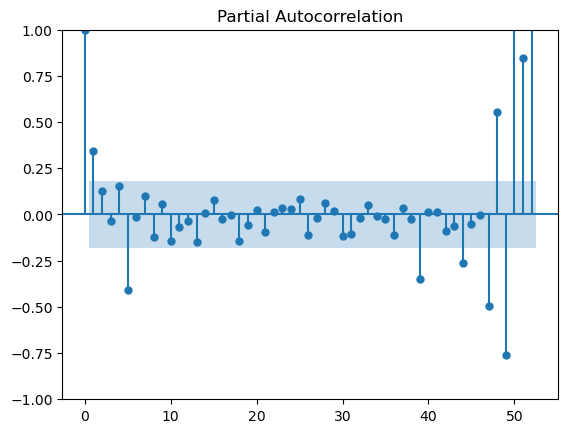

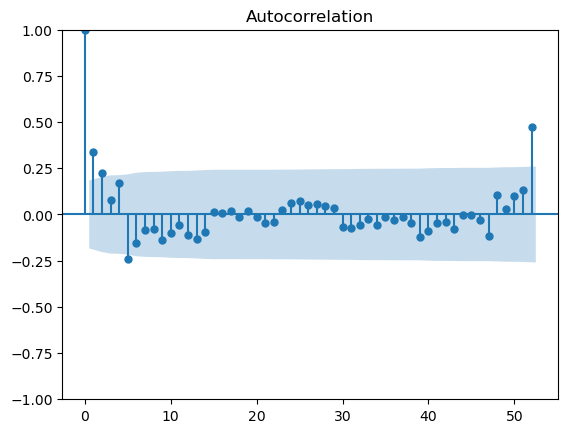

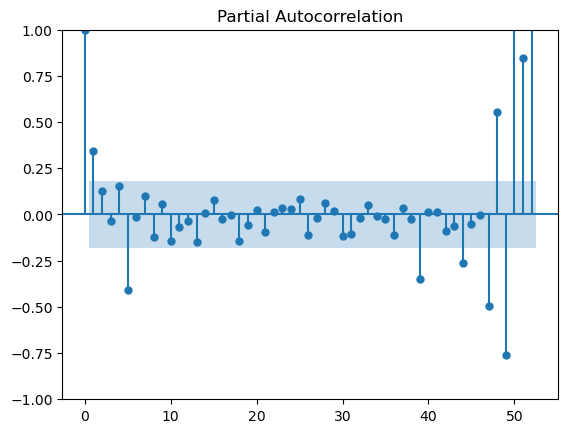

In [123]:
# plot ACF and PACF to determine the order of the ARIMA model

plot_acf(train_sales, lags=52)

plot_pacf(train_sales, lags=52)

Based on the `ACF` plot, it looks like `q <= 2` because the first two consecutive lags are significant.

From the `PACF` plot, it looks like `p <= 1` because only the first lag is significant.

This is enough to now choose the right parameters (`max_p` and `max_q`) in the auto_arima function accordingly.

In [124]:
# Fit auto_arima model

arima_model = auto_arima(train_sales, seasonal=False, information_criterion='bic',
                         start_p=0, start_q=0, max_p=1, max_q=2,
                         stepwise=True, suppress_warnings=True, trace=True, error_action="ignore")

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=4358.919, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=4289.811, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=3903.005, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=3903.543, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=4271.575, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=3886.585, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=3886.856, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=3882.583, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=3891.769, Time=0.00 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.289 seconds


Since we can see that there might be some seasonal patterns in the data, judging by the ACF and PACF plot, we want to also create a `seasonal model` and investigate its performance. Without seasonal component, the best model is `ARIMA(1,0,0)(0,0,0)[0] intercept` and achieves a BIC of `3882.583`.

In [125]:
# Fit SARIMA model

sarima_model_0 = auto_arima(train_sales, seasonal=True, information_criterion='bic',
                            start_p=0, start_q=0, max_p=1, max_q=2, 
                            stepwise=True, suppress_warnings=True, trace=True, error_action="ignore")

sarima_model_7 = auto_arima(train_sales, seasonal=True, m=7, information_criterion='bic',
                            start_p=0, start_q=0, max_p=1, max_q=2, 
                            stepwise=True, suppress_warnings=True, trace=True, error_action="ignore")

sarima_model_52 = auto_arima(train_sales, seasonal=True, m=52, information_criterion='bic',
                            start_p=0, start_q=0, max_p=1, max_q=2, 
                            stepwise=True, suppress_warnings=True, trace=True, error_action="ignore")

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=3891.769, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=3882.583, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=3886.856, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=4358.919, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=3886.585, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.132 seconds
Performing stepwise search to minimize bic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : BIC=3900.259, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : BIC=3891.769, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : BIC=3887.304, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : BIC=3891.168, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[7]             : BIC=4358.919, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : BIC=3882.583, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : BIC=3887.281

After having experimented with different m parameters, we see that overall, the SARIMA model with parameters `ARIMA(1,0,0)(0,0,2)[52] intercept` yields the lowest BIC result and therefore the best fit to the sales training data. This is the model we will now use to predict on the test set and compare performances between ARIMA, SARIMA and SARIMAX.

Now, let's compare the performance of `ARIMA(1,0,0)(0,0,0)[0] intercept` and the `(S)ARIMA(1,0,0)(0,0,2)[52] intercept` on the test set. Based on the best performing model, the model will then be attempted to be further improved with additional, independent variable(s). 

### 1. ARIMA performance

In [126]:
# Fit ARIMA model: ARIMA(1,0,0)(0,0,0)[0] intercept

arima_model = ARIMA(train_sales, order=(1,0,0), trend='c')
arima_model_fit = arima_model.fit()


c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


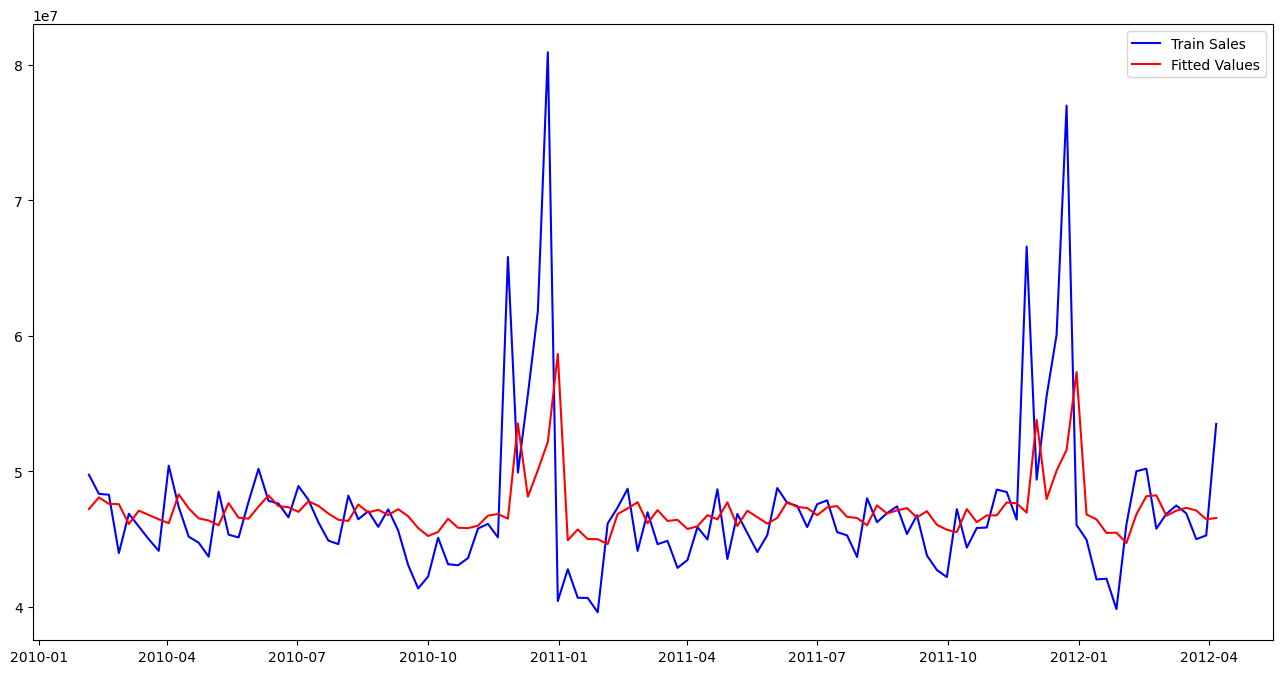

In [127]:
# plot fit to train data

plt.figure(figsize=(16, 8))
plt.plot(train_dates, train_sales, label='Train Sales', color='blue')
plt.plot(train_dates, arima_model_fit.fittedvalues, label='Fitted Values', color='red')
plt.legend()
plt.show()

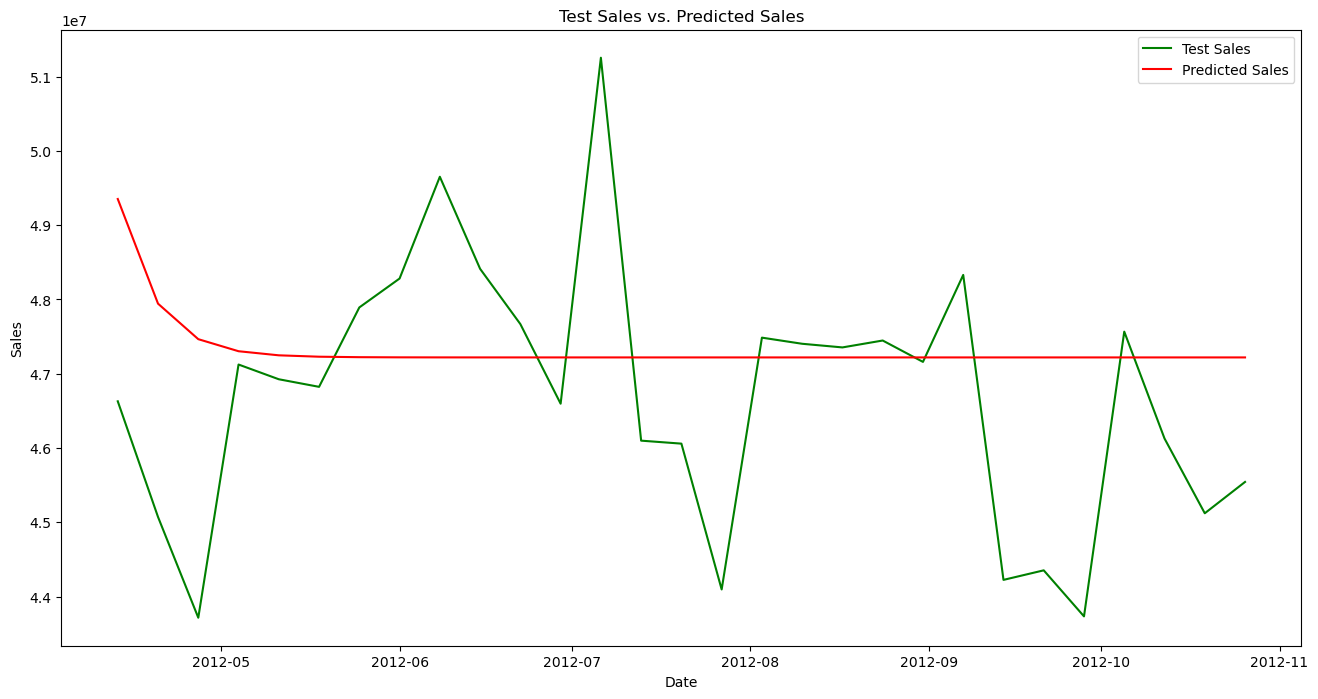

In [128]:
# predict on test set

arima_pred = arima_model_fit.forecast(len(test_sales), type='levels')

# visualize the prediction
plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, arima_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

### 2) Seasonal Arima Model (SARIMA)

In [129]:
# Fit SARIMA Model: (S)ARIMA(1,0,0)(0,0,2)[52] intercept

sarima_model = ARIMA(train_sales, order=(1,0,0), seasonal_order=(0,0,2,52), trend='c')
sarima_model_fit = sarima_model.fit()

c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


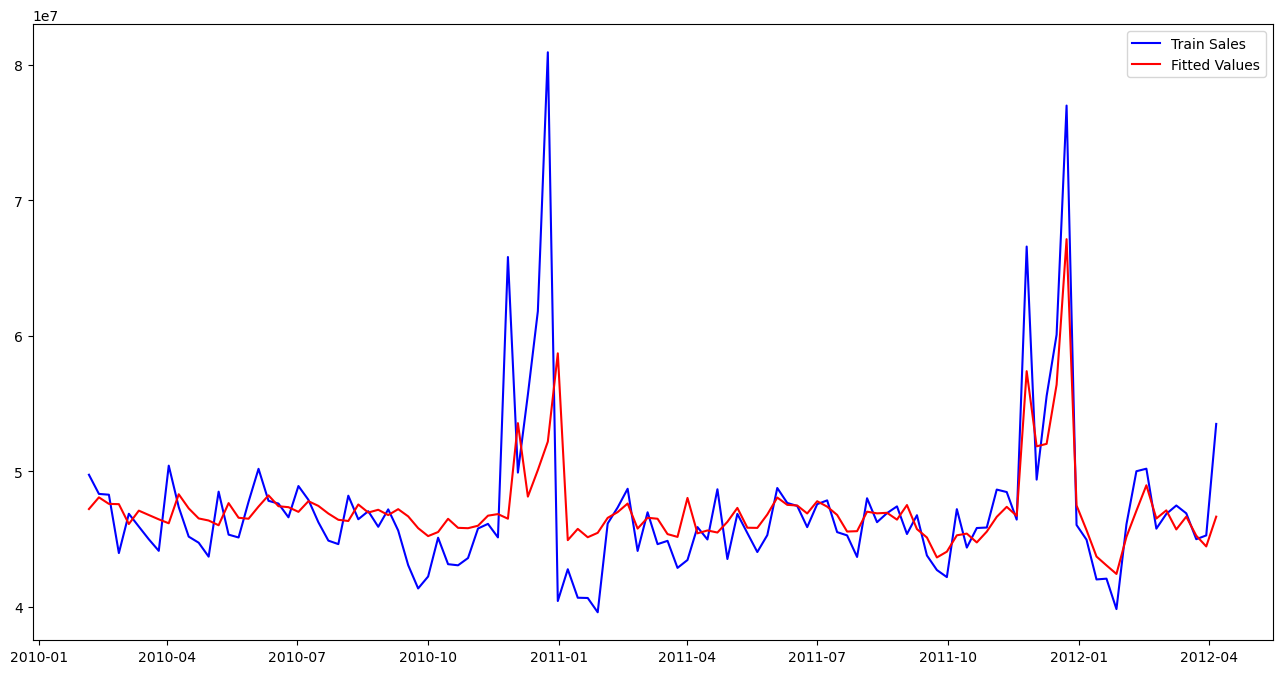

In [130]:
# plot fit to train data

plt.figure(figsize=(16, 8))
plt.plot(train_dates, train_sales, label='Train Sales', color='blue')
plt.plot(train_dates, sarima_model_fit.fittedvalues, label='Fitted Values', color='red')
plt.legend()
plt.show()

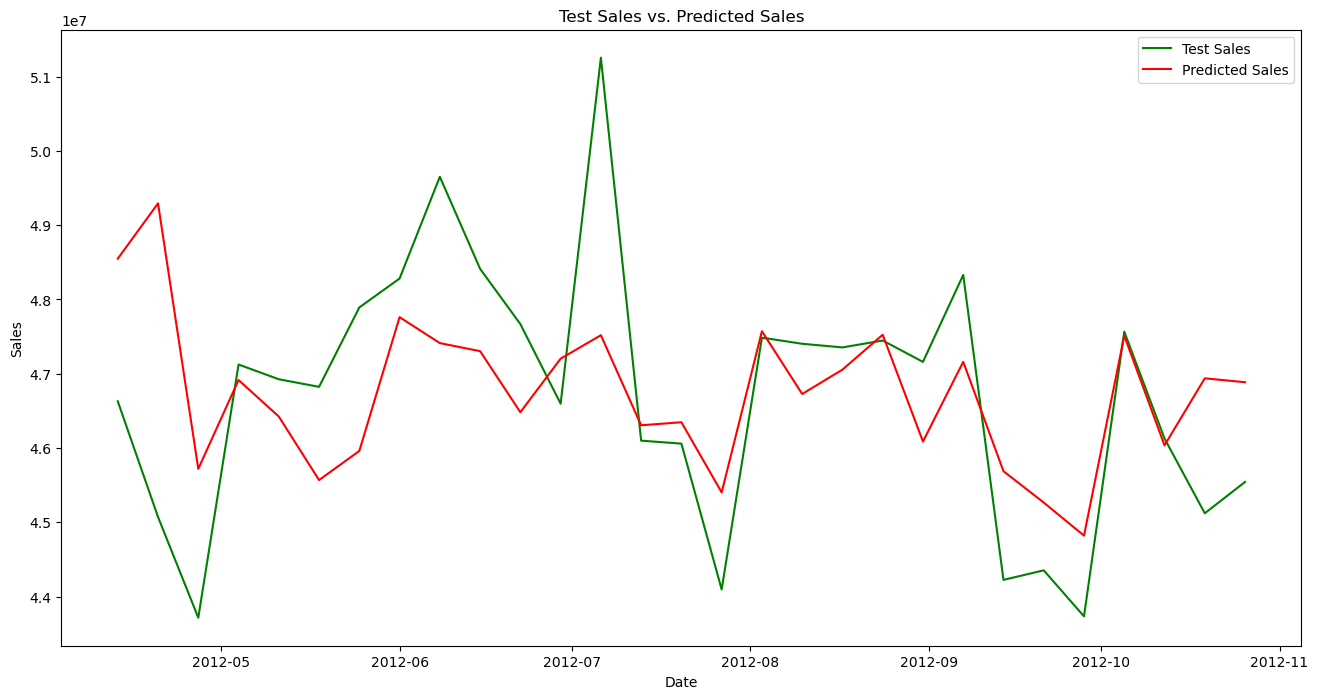

In [131]:
# predict on test set

sarima_pred = sarima_model_fit.forecast(len(test_sales), type='levels')

# visualize the prediction
plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, sarima_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

It is highly noticeable that the `SARIMA model` with the seasonal component outperforms the ARIMA model in predicting the Walmart in the created Train/Test data split. We now want to observe the performances with the relevant metrics chosen for this case, `MSE, RMSE and MAPE`.

In [132]:
# calculate the mean squared error, rmse, mape for ARIMA and SARIMA

mse_arima = mean_squared_error(test_sales, arima_pred)
rmse_arima = sqrt(mse_arima)
mape_arima = mean_absolute_percentage_error(test_sales, arima_pred)*100

mse_sarima = mean_squared_error(test_sales, sarima_pred)
rmse_sarima = sqrt(mse_sarima)
mape_sarima = mean_absolute_percentage_error(test_sales, sarima_pred)*100

print("ARIMA: RMSE = ", round(rmse_arima,2), "MAPE = ", round(mape_arima,2))
print("SARIMA: RMSE = ", round(rmse_sarima,2), "MAPE = ", round(mape_sarima,2))

ARIMA: RMSE =  1924110.71 MAPE =  3.19
SARIMA: RMSE =  1525706.06 MAPE =  2.47


## SARIMAX: Boosting model performance through exogenous variables

In [133]:
# check whether holiday for all the same for reasons of data quality

holiday = data_raw.groupby('Date')['IsHoliday'].nunique()
print(max(holiday))


# make isholiday usable for the model
isholiday = data_raw.groupby('Date')['IsHoliday'].max()
isholiday


1


Date
2010-02-05    0
2010-02-12    1
2010-02-19    0
2010-02-26    0
2010-03-05    0
             ..
2012-09-28    0
2012-10-05    0
2012-10-12    0
2012-10-19    0
2012-10-26    0
Name: IsHoliday, Length: 143, dtype: int64

In [134]:
# also use the average temperature for the model

temperature = data_raw.groupby('Date')['Temperature'].mean()
temperature

# add CPI and Unemployment to the model

cpi = data_raw.groupby('Date')['CPI'].mean()

unemployment = data_raw.groupby('Date')['Unemployment'].mean()

# for all objects, split the data as before in 80/20 split (train test)

train_fuel_price = fuel_price[:int(0.8*(len(fuel_price)))]
test_fuel_price = fuel_price[int(0.8*(len(fuel_price))):]

train_cpi = cpi[:int(0.8*(len(cpi)))]
test_cpi = cpi[int(0.8*(len(cpi))):]

train_unemployment = unemployment[:int(0.8*(len(unemployment)))]
test_unemployment = unemployment[int(0.8*(len(unemployment))):]

train_isholiday = isholiday[:int(0.8*(len(isholiday)))]
test_isholiday = isholiday[int(0.8*(len(isholiday))):]

train_temperature = temperature[:int(0.8*(len(temperature)))]
test_temperature = temperature[int(0.8*(len(temperature))):]
                               
# check lengths of all objects compared to train_sales and test_sales

print(len(train_fuel_price))
print(len(test_fuel_price))

print(len(train_cpi))
print(len(test_cpi))

print(len(train_unemployment))
print(len(test_unemployment))

print(len(train_isholiday))
print(len(test_isholiday))

print(len(train_temperature))
print(len(test_temperature))
                      

114
29
114
29
114
29
114
29
114
29


In [135]:
# Create SARIMAX model with exogenous variables

# Merge the exogenous variables into a single dataframe with the train sales data

exog_train = pd.concat([train_cpi, train_fuel_price, train_unemployment, train_isholiday, train_temperature], axis=1)
exog_train.columns = ['CPI', 'Fuel_Price', 'Unemployment', 'IsHoliday', 'Temperature']
print(exog_train)
# Fit SARIMAX model

# sarimax_model = ARIMA(train_sales, order=(1,0,0), seasonal_order=(0,0,2,52), exog=exog_train, trend='c')

                   CPI  Fuel_Price  Unemployment  IsHoliday  Temperature
Date                                                                    
2010-02-05  167.398405    2.717869      8.576731          0    33.277942
2010-02-12  167.384138    2.696102      8.567309          1    33.361810
2010-02-19  167.338966    2.673666      8.576351          0    37.038310
2010-02-26  167.691019    2.685642      8.561375          0    38.629563
2010-03-05  167.727351    2.731816      8.572689          0    42.373998
...                ...         ...           ...        ...          ...
2012-03-09  174.610303    3.751709      7.486587          0    47.016190
2012-03-16  174.857732    3.824211      7.486935          0    54.330752
2012-03-23  174.956546    3.865280      7.482098          0    56.960807
2012-03-30  174.871741    3.930751      7.485908          0    56.975768
2012-04-06  174.910693    3.963752      7.399025          0    56.407154

[114 rows x 5 columns]


In [136]:
# Fit the SARIMA model (S)ARIMA(1,0,0)(0,0,2)[52] intercept with exogenous variables

sarimax_model = ARIMA(train_sales, order=(1,0,0), seasonal_order=(0,0,2,52), exog=exog_train, trend='c')
sarimax_model_fit = sarimax_model.fit()

c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


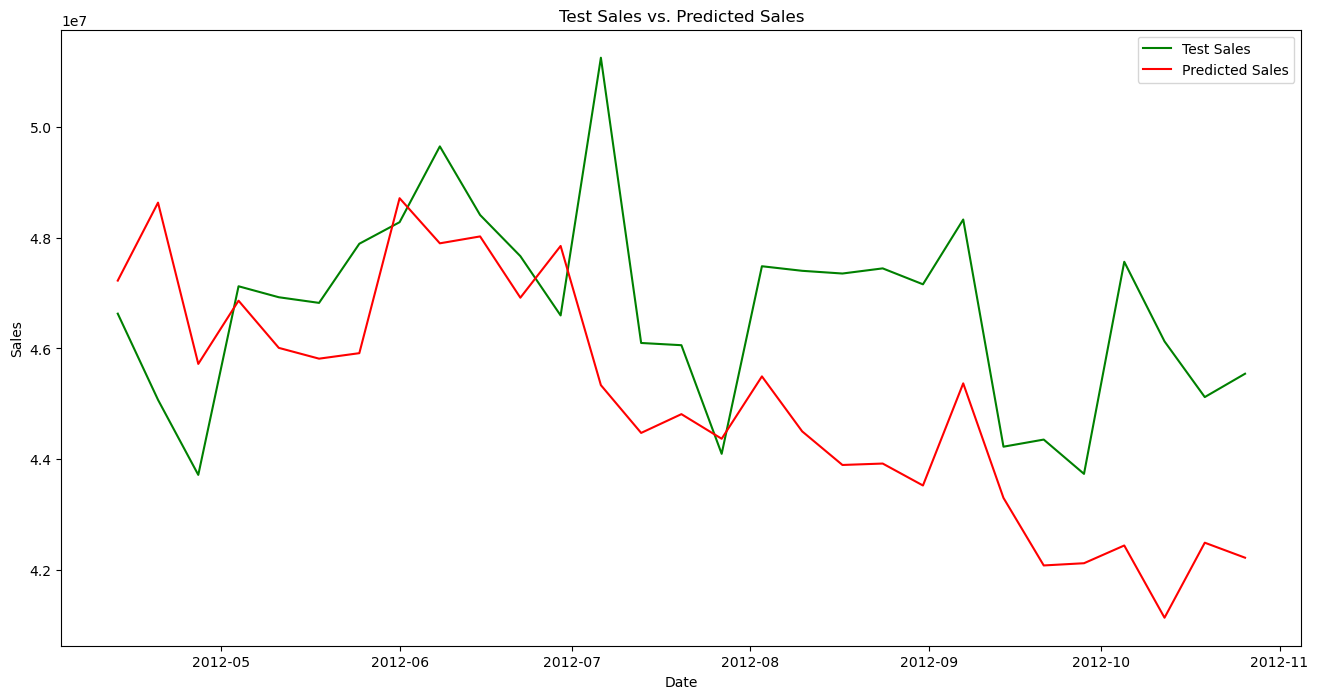

In [137]:
# predict on test set

sarimax_model_pred = sarimax_model_fit.forecast(len(test_sales), exog=pd.concat([test_cpi, test_fuel_price, test_unemployment, test_isholiday, test_temperature], axis=1))

# visualize the prediction

plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, sarimax_model_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

In [138]:
# calculate the mean squared error, rmse, mape for SARIMAX

mse_sarimax = mean_squared_error(test_sales, sarimax_model_pred)
rmse_sarimax = sqrt(mse_sarimax)
mape_sarimax = mean_absolute_percentage_error(test_sales, sarimax_model_pred)*100

print("SARIMAX: RMSE = ", round(rmse_sarimax,2), "MAPE = ", round(mape_sarimax,2))

SARIMAX: RMSE =  2653716.59 MAPE =  4.65


# Results from (S)ARIMA(X)

The Seasonal ARIMA model outperformed the ARIMA model. However, including the chosen exogenous variables seemed to have created too much noise and we can hence see a decrease in the model's predictive performance on the test set.

Therefore, we can conclude that the `SARIMA` model was the best within its category.

# Overall results

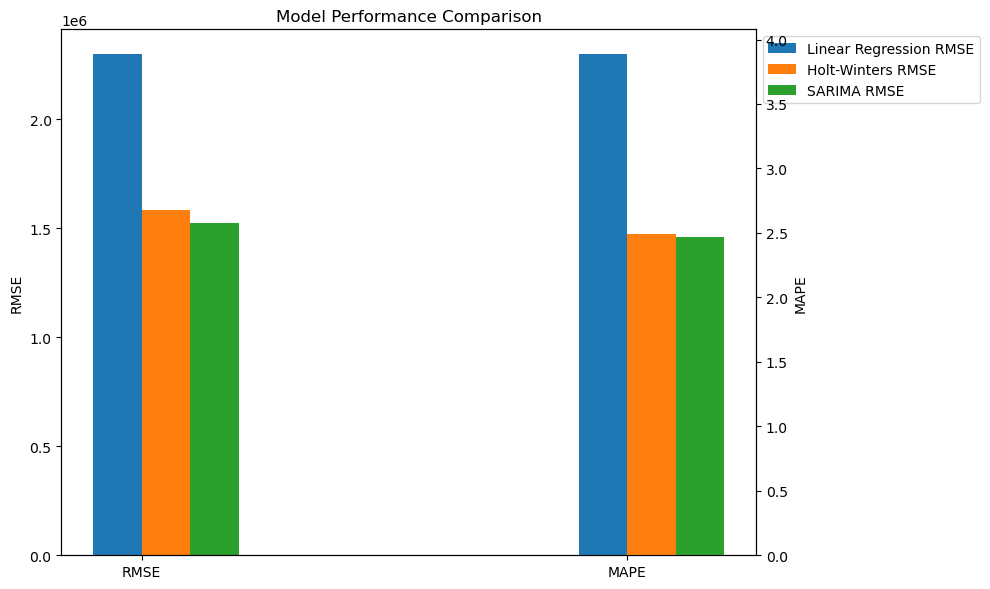

In [164]:
# Create graphic that compares the performance of linear regression, Holt-Winters, SARIMA

models = ['Linear Regression', 'Holt-Winters', 'SARIMA']

rmse = [rmse_lm, rmse_hw, rmse_sarima]

mape = [mape_lm, mape_hw, mape_sarima]

# Colors for each model
model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Positions for the ticks on the x-axis
metrics = ['RMSE', 'MAPE']
x_positions = np.arange(len(metrics))  # One position for each metric
bar_width = 0.1  # Width of each bar

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE on the primary y-axis
for i, model in enumerate(models):
    ax1.bar(x_positions[0] - bar_width / 2 + i * bar_width, rmse[i], width=bar_width, color=model_colors[i], label=model)

# Create a secondary y-axis and plot MAPE on it
ax2 = ax1.twinx()
for i, model in enumerate(models):
    ax2.bar(x_positions[1] - bar_width / 2 + i * bar_width, mape[i], width=bar_width, color=model_colors[i], label=model)

# Set the x-ticks to be the metric names (RMSE and MAPE)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(metrics)

# Add a legend
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels
ax1.set_ylabel('RMSE')
ax2.set_ylabel('MAPE')

# Add a title
plt.title('Model Performance Comparison')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


# Best Predictive Model: SARIMA